1. **데이터 병합**
    - 06_Data 폴더 내의 모든 데이터를 병합하여 변수 **df3**에 저장한 후, df3를 활용하여 아래 문제들을 해결하시오.

In [2]:
import pandas as pd 

df0 = pd.read_csv("Data/06_Data/기간발주데이터_1905001.csv")
df1 = pd.read_csv("Data/06_Data/기간발주데이터_1906001.csv")
df2 = pd.read_csv("Data/06_Data/기간발주데이터_1907001.csv")
df4 = pd.read_csv("Data/06_Data/기간발주데이터_1908001.csv")

df3 = pd.concat([df0, df1, df2, df4], ignore_index = True)
df3.head()

,Unnamed: 0,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량
0,0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.750000,80.668990
1,1,2019-05-16,29350,리큐 진한겔드럼 3L NEW,8801046893128,발주가능,0,235,2772,6077394,19리큐 진한겔 알카2.7용기(드),세탁세제,4,58.750000,47.182979
2,2,2019-05-16,29351,울샴푸아웃도어 800ml 용기,8801046878934,발주가능,0,2,35,6077406,19울샴푸아웃도 800ml(리뉴얼),세탁세제,9,0.222222,157.500000
3,3,2019-05-16,29352,울샴푸아웃도어 1L 일자형 리필,8801046878941,발주가능,207,41,2083,6077404,19울샴푸아웃도 1L(리뉴얼),세탁세제,9,4.555556,457.243902
4,4,2019-05-16,29359,Pack 2080오리지날칫솔 5+5입_탄력모,8801046888858,발주가능,288,312,3411,5009109,182080오리지날칫솔 5+5입(탄력모),덴탈케어,8,39.000000,87.461538


2. **쿠팡출고수량 증감률 계산 (전체)**
    - 2019년 5월과 8월의 **쿠팡출고수량**을 비교하여, 8월의 수량이 5월 대비 몇 퍼센트 증가하였는지 계산하시오.

In [3]:
df3["날짜"] = pd.to_datetime(df3["날짜"])

aug = df3[df3["날짜"].dt.month == 8]["쿠팡출고수량"].sum()
may = df3[df3["날짜"].dt.month == 5]["쿠팡출고수량"].sum()
((aug - may) / may) * 100

# 53% 감소

-53.2564169644306

3. **쿠팡출고수량 증감률 계산 (카테고리별)**
    - 각 카테고리별로 5월과 8월의 **쿠팡출고수량** 증감률(퍼센트 변화)을 산출하시오.

In [59]:
df3["날짜"] = pd.to_datetime(df3["날짜"])

aug = df3[df3["날짜"].dt.month == 8].groupby("카테고리")["쿠팡출고수량"].sum()
may = df3[df3["날짜"].dt.month == 5].groupby("카테고리")["쿠팡출고수량"].sum()
((aug - may) / may) * 100

# F&B는 58% 감소, ST는 33% 감소, ...

카테고리
F&B     -58.183814
ST      -33.865684
기타      -46.933819
덴탈케어    -58.722402
매입브랜드   -64.104014
세탁세제    -50.149297
주방세제    -46.816366
헤어케어    -54.745126
Name: 쿠팡출고수량, dtype: float64

4. **발주중단 데이터 분석**
    - **발주가능상태** 컬럼에서 값이 '발주중단'인 데이터만 추출한 후,
        - 각 카테고리의 빈도수를 확인하고,
        - 연속형 변수(예: 수량)의 기술 통계량(평균, 표준편차, 최소값, 최대값 등)을 계산하시오.

In [69]:
df = df3[df3["발주가능상태"] == "발주중단"]
df.groupby("카테고리").value_counts()

카테고리  Unnamed: 0  날짜          SKU ID    SKU 명                             바코드            발주가능상태  입고수량  쿠팡출고수량  쿠팡현재재고수량  자재번호     자재명                          입수  출고수량      재고수량      
덴탈케어  35659       2019-08-04  4099350   2080치석 집중케어 미세모 5+5               8801046290194  발주중단    0     1       0         5008395  162080치석 집중케어 미세모 5+5        8   0.125000  0.000000      1
      35968       2019-08-05  4099350   2080치석 집중케어 미세모 5+5               8801046290194  발주중단    0     6       1         5008395  162080치석 집중케어 미세모 5+5        8   0.750000  1.333333      1
      36296       2019-08-06  4099350   2080치석 집중케어 미세모 5+5               8801046290194  발주중단    0     1       0         5008395  162080치석 집중케어 미세모 5+5        8   0.125000  0.000000      1
세탁세제  30411       2019-07-18  309777    스파크 퍼펙트 실내에서 항균건조 4.4kg 리필        8801046877920  발주중단    0     26      2435      6067009  18 스파크퍼펙트 실내항균 4.4kg 리필      4   6.500000  374.615385    1
      30725       2019-07-19  309777    스파크 퍼펙트 실내에서 항균건조 4.

In [70]:
df.describe()

,Unnamed: 0,날짜,SKU ID,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,입수,출고수량,재고수량
count,95.000000,95,9.500000e+01,95.000000,95.000000,95.000000,9.500000e+01,95.000000,95.000000,95.000000
mean,28616.242105,2019-07-15 00:00:00,3.559700e+06,14.357895,10.989474,516.526316,6.038457e+06,7.515789,2.095614,318.160424
min,15576.000000,2019-06-18 00:00:00,3.097770e+05,0.000000,0.000000,0.000000,5.008395e+06,4.000000,0.000000,0.000000
25%,26683.000000,2019-07-09 12:00:00,2.383418e+06,0.000000,2.000000,20.500000,6.068195e+06,4.000000,0.200000,43.036364
50%,29684.000000,2019-07-15 00:00:00,3.367647e+06,0.000000,8.000000,164.000000,6.075507e+06,10.000000,0.800000,210.000000
75%,31374.500000,2019-07-21 00:00:00,3.367649e+06,0.000000,14.500000,246.000000,6.075508e+06,10.000000,3.375000,379.307692
max,36563.000000,2019-08-07 00:00:00,1.023964e+07,216.000000,100.000000,3077.000000,6.075508e+06,10.000000,16.666667,2080.000000
std,4672.622153,NaN,2.659679e+06,40.203714,14.443945,938.434514,1.870319e+05,2.763220,2.906945,399.025974


5. **특정 주의 최고 쿠팡출고수량 카테고리 확인**
    - 2019년 7월 두 번째 주에 **쿠팡출고수량**이 가장 높은 카테고리를 확인하시오.


In [4]:
df3["날짜"] = pd.to_datetime(df3["날짜"])

df = df3[(df3["날짜"] >= "2019-07-07") & (df3["날짜"] <= "2019-07-13")]
df.groupby("카테고리")["쿠팡출고수량"].sum().idxmax()

'세탁세제'

6. **자재별 평균 및 등급 분류와 카테고리 확인**
    - 각 **자재명**별로 **쿠팡출고수량**과 **입고수량**의 평균을 계산한 후,
    - 계산된 결과에서 **쿠팡출고수량** 평균을 기준으로
        - 상위 10%에 해당하는 자재명을 'A',
        - 상위 30%를 'B',
        - 상위 60%를 'C',
        - 나머지를 'D'로 분류하는 **등급분류** 파생 변수를 생성하고,
    - 각 등급별로 가장 빈번하게 등장하는 카테고리 항목을 확인하시오.

In [3]:
df = df3.groupby("자재명")[["쿠팡출고수량", "입고수량"]].mean().reset_index()
score = df["쿠팡출고수량"].quantile([0.9, 0.7, 0.4]).values 

def grade(value):
    if value >= score[0]:
        return "A"
    elif value >= score[1]:
        return "B"
    elif value >= score[2]:
        return "C"
    else:
        return "D"

df["등급분류"] = df["쿠팡출고수량"].apply(grade)

df3 = df3.merge(df[["자재명", "등급분류"]], on="자재명", how="left")
df3

,Unnamed: 0,날짜,SKU ID,SKU 명,바코드,발주가능상태,입고수량,쿠팡출고수량,쿠팡현재재고수량,자재번호,자재명,카테고리,입수,출고수량,재고수량,등급분류
0,0,2019-05-16,29349,리큐진한겔일반 3LNEW,8801046893111,발주가능,384,287,5788,6077374,19리큐 진한겔 알카2.7용기(일),세탁세제,4,71.750000,80.668990,B
1,1,2019-05-16,29350,리큐 진한겔드럼 3L NEW,8801046893128,발주가능,0,235,2772,6077394,19리큐 진한겔 알카2.7용기(드),세탁세제,4,58.750000,47.182979,A
2,2,2019-05-16,29351,울샴푸아웃도어 800ml 용기,8801046878934,발주가능,0,2,35,6077406,19울샴푸아웃도 800ml(리뉴얼),세탁세제,9,0.222222,157.500000,C
3,3,2019-05-16,29352,울샴푸아웃도어 1L 일자형 리필,8801046878941,발주가능,207,41,2083,6077404,19울샴푸아웃도 1L(리뉴얼),세탁세제,9,4.555556,457.243902,C
4,4,2019-05-16,29359,Pack 2080오리지날칫솔 5+5입_탄력모,8801046888858,발주가능,288,312,3411,5009109,182080오리지날칫솔 5+5입(탄력모),덴탈케어,8,39.000000,87.461538,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36828,36828,2019-08-07,10360959,"샤워메이트 보타닉테라스 워시 버베나 1.2kg, 1개",8801046329085,발주가능,8,13,118,6075867,19샤워메이트보타닉테라 1.2Kg버베나(온)책,세탁세제,8,1.625000,72.615385,D
36829,36829,2019-08-07,10360960,"2080 퓨어 핑크솔트 가글 750ML, 1개",8801046330296,발주가능,12,3,11,6076086,192080가글 핑크솔트750ML(마일드,세탁세제,6,0.500000,22.000000,D
36830,36830,2019-08-07,10360962,"샤워메이트 보타닉테라스 워시 카렌듈라 1.2kg, 1개",8801046329092,발주가능,64,45,115,6075870,19샤워메이트보타닉테 1.2Kg카렌듈라(온)책,세탁세제,8,5.625000,20.444444,C
36831,36831,2019-08-07,10365807,스팀클리너 10입 CASE,8801046325315,발주가능,25,8,217,5009289,18스팀클리너 9+1입 CASE,세탁세제,25,0.320000,678.125000,C


In [7]:
df3.groupby("등급분류")["카테고리"].value_counts()

등급분류  카테고리 
A     주방세제     1213
      덴탈케어     1071
      세탁세제     1008
      헤어케어      918
      F&B       244
B     세탁세제     2850
      덴탈케어     1861
      주방세제     1471
      헤어케어     1044
      F&B      1021
      기타        168
      매입브랜드      84
C     세탁세제     4107
      헤어케어     2528
      덴탈케어     2151
      ST       1396
      주방세제      908
      F&B       711
      매입브랜드     373
      기타         84
D     ST       2965
      덴탈케어     2513
      세탁세제     2374
      헤어케어     2322
      F&B       607
      주방세제      550
      기타        155
      매입브랜드     136
Name: count, dtype: int64

7. **사용자 입력 기반 월별 시각화 함수 작성**
    - 사용자로부터 특정 **카테고리**를 입력받은 후, 해당 카테고리의 데이터에서
        - **발주가능상태**별 및 날짜 컬럼을 활용해 계산한 **월**별 **쿠팡출고수량** 합계를 산출하고 시각화하며,
        - 결과 그래프를 `카테고리명_월별_쿠팡출고량.png` 파일로 저장하는 함수를 작성하시오.


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df3["카테고리"].unique()

array(['세탁세제', '덴탈케어', '헤어케어', '주방세제', 'ST', 'F&B', '기타', '매입브랜드'],
      dtype=object)

조회할 카테고리:  세탁세제


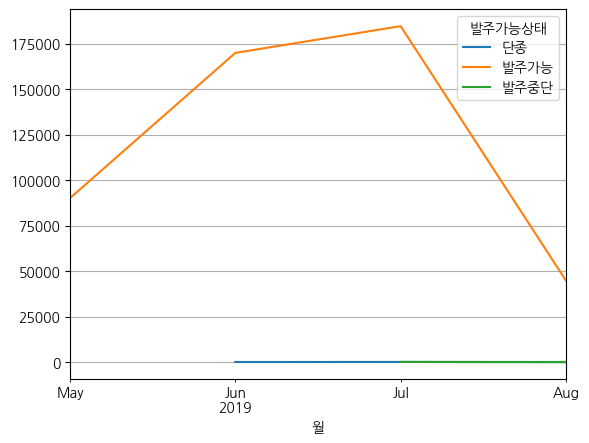

In [8]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

def func(df, category_name):
    df1 = df[df["카테고리"] == category_name].copy()
    df1["날짜"] = pd.to_datetime(df1["날짜"])
    df1["월"] = df1["날짜"].dt.to_period("M")

    sales = df1.groupby(["월", "발주가능상태"])["쿠팡출고수량"].sum().unstack()
    sales.plot()
    plt.grid(axis = "y")

    filename = f"{category_name}_월별_쿠팡출고량.png"
    plt.savefig(filename)
    plt.show()

category = input("조회할 카테고리: ")
func(df3, category)

8. **최다 빈도 카테고리 데이터 추출 및 저장**
    - 데이터에서 가장 많이 등장하는 카테고리에 해당하는 데이터 중,
        - **입고수량**이 높은 상위 100개의 데이터를 추출하여
        - `result_category.xlsx` 파일로 저장하시오.

In [43]:
df3["카테고리"].value_counts().idxmax()

'세탁세제'

In [57]:
df = df3[df3["카테고리"] == "세탁세제"].sort_values("입고수량", ascending = False).head(100)
df.to_excel("result_category.xlsx", index = False)

9. **7월과 8월의 평균 및 합계 차이 계산**
    - 각 카테고리별로 7월과 8월의 **쿠팡출고수량**에 대한 평균 및 합계를 산출한 후,
        - 두 달 간의 차이를 계산하시오.

In [9]:
df3["날짜"] = pd.to_datetime(df3["날짜"])

jul = df3[df3["날짜"].dt.month == 7]
aug = df3[df3["날짜"].dt.month == 8]

abs(aug.groupby("카테고리")["쿠팡출고수량"].agg(["mean", "sum"]) - jul.groupby("카테고리")["쿠팡출고수량"].agg(["mean", "sum"]))

,mean,sum
카테고리,,
F&B,12.470227,32668
ST,3.915237,6768
기타,3.223365,2341
덴탈케어,21.115412,114295
매입브랜드,2.594365,2160
세탁세제,10.547251,139922
주방세제,17.291145,83841
헤어케어,15.699809,94181


10. **상관관계 시각화**
    - **입고수량**과 **쿠팡출고수량** 간의 상관관계를 산점도를 이용하여 시각화하시오.

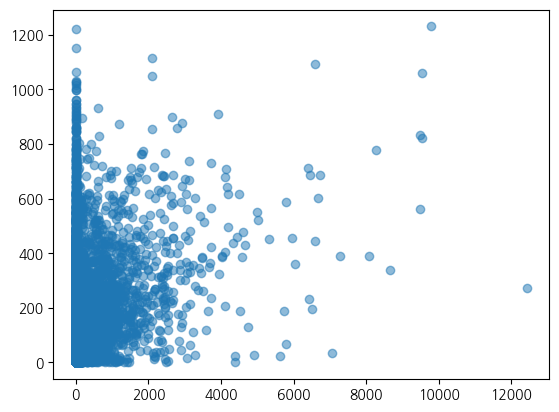

In [11]:
plt.scatter(df3["입고수량"], df3["쿠팡출고수량"], alpha = 0.5)    # alpha로 투명도 조절 
plt.show()